In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]) #using simple 2d array for ease of plotting, we can have
#much complex data too.

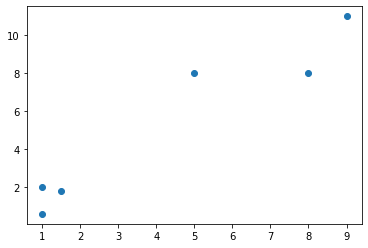

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
# def fit(data, k = 2, max_iter = 100): #where, k -> number of clusters
#     means = [] #list of means of all the clusters
#     #randomly initialize the means
#     for i in range(k):
#         means.append(data[i])
#     for i in range(max_iter):
#         #assign the datapoints to the cluster that they belong to
#         #create empty clusters
#         clusters = []
#         for j in range(k):
#             clusters.append([])
#         for datapoint in data: #remember that the datapoint is an np-array
#             #find distance to all the mean values
#             distances = [((datapoint - m)**2).sum() for m in means]
#             #find the minimum distance
#             minDistance = min(distances)
#             #find the mean for which we got the minimum distance --> l
#             l = distances.index(minDistance)
#             #add this point to cluster l
#             clusters[l].append(datapoint)
            
#         #calculate the new mean values
#         for j in range(k):
#             new_mean = np.average(clusters[j])
#             means[j] = new_mean
    
#     return means

In [6]:
# fit(X)

In [7]:
#There's a problem here, as we have k=2, we should get 2 mean values, one for each cluster, and in the form of 
#[[[xcoordinate_mean_of_cluster0],[ycoordinate_mean_of_cluster0]], 
#[[xcoordinate_mean_of_cluster1],[ycoordinate_mean_of_cluster1]]]
#But, instead we're getting [[mean_of_cluster0], [mean_of_cluster1]]
#Thus, we need to mention axis = 0 while computing new_mean.

In [13]:
# def fit(data, k = 2, max_iter = 100): #where, k -> number of clusters
#     means = [] #list of means of all the clusters
#     #randomly initialize the means
#     for i in range(k):
#         means.append(data[i])
#     for i in range(max_iter):
#         #assign the datapoints to the cluster that they belong to
#         #create empty clusters
#         clusters = []
#         for j in range(k):
#             clusters.append([])
#         for datapoint in data: #remember that the datapoint is an np-array
#             #find distance to all the mean values
#             distances = [((datapoint - m)**2).sum() for m in means]
#             #find the minimum distance
#             minDistance = min(distances)
#             #find the mean for which we got the minimum distance --> l
#             l = distances.index(minDistance)
#             #add this point to cluster l
#             clusters[l].append(datapoint)
            
#         #calculate the new mean values
#         change = False #if there's no change in mean, then we must not iterate further
#         for j in range(k):
#             new_mean = np.average(clusters[j], axis = 0)
#             if not np.array_equal(means[j], new_mean):
#                 change = True
#             means[j] = new_mean
#         if not change:
#             break
    
#     return means

In [14]:
# def predict(test_data, means): #determines in which cluster which data point will go.
#     predictions = []
#     for datapoint in test_data:
#         #find distance to all the mean values
#         distances = [((datapoint - m)**2).sum() for m in means]
#         #find the minimum distance
#         minDistance = min(distances)
#         #find the mean for which we got the minimum distance --> l
#         l = distances.index(minDistance)
#         #add this point to cluster l
#         predictions.append(l)
#     return predictions

In [15]:
means = fit(X)

In [16]:
 predict(X, means)

[0, 0, 1, 1, 0, 1]

In [17]:
#We are getting the exact results that we got while we were using SKlearn's KMeans algorithm.  

In [18]:
#Now we would like to create a class of our KMeans algorithm so that we can use it whenever we want just by creating its
#object.
#We will copy paste the predict() and fit(), and just make a few modifications in them by including the 'self'.

In [19]:
# class K_Means: #Not naming KMeans in order to avoid confusion with sklearn's KMeans
#     def __init__(self): #this is our constructor
#         print("constructor")
#     #Now copy paste fit() and predict(), and add self argument
#     def fit(self, data, k = 2, max_iter = 100): #where, k -> number of clusters
#         means = [] #list of means of all the clusters
#         #randomly initialize the means
#         for i in range(k):
#             means.append(data[i])
#         for i in range(max_iter):
#             #assign the datapoints to the cluster that they belong to
#             #create empty clusters
#             clusters = []
#             for j in range(k):
#                 clusters.append([])
#             for datapoint in data: #remember that the datapoint is an np-array
#                 #find distance to all the mean values
#                 distances = [((datapoint - m)**2).sum() for m in means]
#                 #find the minimum distance
#                 minDistance = min(distances)
#                 #find the mean for which we got the minimum distance --> l
#                 l = distances.index(minDistance)
#                 #add this point to cluster l
#                 clusters[l].append(datapoint)

#             #calculate the new mean values
#             change = False #if there's no change in mean, then we must not iterate further
#             for j in range(k):
#                 new_mean = np.average(clusters[j], axis = 0)
#                 if not np.array_equal(means[j], new_mean):
#                     change = True
#                 means[j] = new_mean
#             if not change:
#                 break

#         return means
    
#     def predict(self, test_data, means): #determines in which cluster which data point will go.
#         predictions = []
#         for datapoint in test_data:
#             #find distance to all the mean values
#             distances = [((datapoint - m)**2).sum() for m in means]
#             #find the minimum distance
#             minDistance = min(distances)
#             #find the mean for which we got the minimum distance --> l
#             l = distances.index(minDistance)
#             #add this point to cluster l
#             predictions.append(l)
#         return predictions

In [20]:
# kmeans = K_Means() #creating an object of K_Means class

constructor


In [22]:
# means = kmeans.fit(X)

In [23]:
# kmeans.predict(X, means)

[0, 0, 1, 1, 0, 1]

In [24]:
#As you can see we are getting correct results.
#But, we can make our code better. Right now we have just clubbed the functions into the class, but they're not communicating
#with each other.
#We must not need to pass the 'means' to the predict(), it should take it from the object itself. Also, we must be able to 
#mention the number of clusters and max iterations during the time of creating the object only.
#So, let's make those changes in our class code

In [25]:
class K_Means: #Not naming KMeans in order to avoid confusion with sklearn's KMeans
    def __init__(self, k = 2, max_iter = 100): #this is our constructor
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    #Now copy paste fit() and predict(), and add self argument
    def fit(self, data): #where, k -> number of clusters
        self.means = [] #list of means of all the clusters
        #randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            #assign the datapoints to the cluster that they belong to
            #create empty clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for datapoint in data: #remember that the datapoint is an np-array
                #find distance to all the mean values
                distances = [((datapoint - m)**2).sum() for m in self.means]
                #find the minimum distance
                minDistance = min(distances)
                #find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(datapoint)

            #calculate the new mean values
            change = False #if there's no change in mean, then we must not iterate further
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self, test_data): #determines in which cluster which data point will go.
        predictions = []
        for datapoint in test_data:
            #find distance to all the mean values
            distances = [((datapoint - m)**2).sum() for m in self.means]
            #find the minimum distance
            minDistance = min(distances)
            #find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)
        return predictions

In [30]:
kmeans = K_Means(2, 10) #creating an object of K_Means class

constructor


In [31]:
kmeans.fit(X)

In [32]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [33]:
#We're still getting the same correct results and our code too has been improved.